In [1]:
import numpy as np
import pandas as pd
import json
import scipy

In [2]:
DIR = '///mnt/c/Personal/Competitions/BEA_2025_track4'
oof_deberta_large = pd.read_csv(f'{DIR}/debetav3_large_multisampleDropout/oofs.csv')
oof_qwen = pd.read_csv(f'{DIR}/Qwen25_0.5/outputs/oof.csv')
oof_deberta_small = pd.read_csv(f'{DIR}/debetav3_small_multisampleDropout_largercontext/oofs.csv')
oof_deberta_base = pd.read_csv(f'{DIR}/debetav3_base_multisampleDropout/oofs.csv')


test_deberta_large = pd.read_csv(f'{DIR}/debetav3_large_multisampleDropout/test_probas.csv')
test_qwen = pd.read_csv(f'{DIR}/Qwen25_0.5/outputs/test_probas.csv')
test_deberta_small = pd.read_csv(f'{DIR}/debetav3_small_multisampleDropout_largercontext/test_probas.csv')
test_deberta_base = pd.read_csv(f'{DIR}/debetav3_base_multisampleDropout/test_probas.csv')

In [3]:
oof_deberta_large.shape,oof_deberta_small.shape,oof_qwen.shape

((2476, 10), (2476, 10), (2476, 10))

In [4]:
test_deberta_large.shape, test_deberta_small.shape,test_qwen.shape

((1547, 8), (1547, 8), (1547, 9))

In [5]:
test_qwen.head(1)

conversation_id  \
0  1030-adb61831-0383-4e51-a673-ab978590f69b   

                                            Question  \
0  Tutor: Hi, could you please provide a step-by-...   

                                            Response tutor_id  \
0  It looks like you've done a great job figuring...  Tutor_1   

                                               input  target_0  target_1  \
0  Question: Tutor: Hi, could you please provide ...  0.467322  0.442984   

   target_2  pred  
0  0.089694     0

In [6]:
test_deberta_large.head(1)

conversation_id  \
0  1030-adb61831-0383-4e51-a673-ab978590f69b   

                                            Question  \
0  Tutor: Hi, could you please provide a step-by-...   

                                            Response tutor_id  target_0  \
0  It looks like you've done a great job figuring...  Tutor_1  0.472032   

   target_1  target_2  pred  
0  0.506789  0.021179     1

In [7]:
oof_deberta_large.head(1)

conversation_id  \
0  221-362eb11a-f190-42a6-b2a4-985fafdcfa9e   

                                            Question  \
0  Tutor: Hi, could you please provide a step-by-...   

                                            Response Actionability_class  \
0  Great, you've correctly identified the cost of...                 Yes   

   target  fold  target_0  target_1  target_2  pred  
0       0     0  0.921625  0.076133  0.002243     0

/home/rajneesh/miniconda3/envs/hf_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-25 17:26:46,923] A new study created in memory with name: no-name-6ebdae72-28ad-4a62-a1fb-e5a77bba4faf
[I 2025-04-25 17:26:46,926] Trial 0 finished with value: 0.6216847602033805 and parameters: {'deberta_large_weight': 0.5611516415334505, 'deberta_small_weight': 7.969454818643936, 'deberta_base_weight': 2.9106359131330697, 'qwen_weight': 1.5751320499779735}. Best is trial 0 with value: 0.6216847602033805.
[I 2025-04-25 17:26:46,928] Trial 1 finished with value: 0.6409567166715334 and parameters: {'deberta_large_weight': 0.20513382630874505, 'deberta_small_weight': 0.2051110418843398, 'deberta_base_weight': 0.13066739238053282, 'qwen_weight': 5.3994844097874335}. Best is trial 1 with value: 0.640956716671533

Starting Optuna optimization...


[I 2025-04-25 17:26:47,133] Trial 28 finished with value: 0.6495742976573583 and parameters: {'deberta_large_weight': 3.4007045235369198, 'deberta_small_weight': 1.5160177621569293, 'deberta_base_weight': 0.13438513952617917, 'qwen_weight': 0.9694197735082708}. Best is trial 16 with value: 0.6514250315305378.
[I 2025-04-25 17:26:47,142] Trial 29 finished with value: 0.6495554254130796 and parameters: {'deberta_large_weight': 3.8840428982797266, 'deberta_small_weight': 0.7756156337661504, 'deberta_base_weight': 0.10171409248130164, 'qwen_weight': 1.4997434012802895}. Best is trial 16 with value: 0.6514250315305378.
[I 2025-04-25 17:26:47,152] Trial 30 finished with value: 0.6350986167114412 and parameters: {'deberta_large_weight': 0.9514946963889518, 'deberta_small_weight': 1.581512286521428, 'deberta_base_weight': 0.2934920035235491, 'qwen_weight': 0.8644627054799461}. Best is trial 16 with value: 0.6514250315305378.
[I 2025-04-25 17:26:47,161] Trial 31 finished with value: 0.647972548

Best trial:
  Score: 0.653622199783474
  Params: 
    deberta_large_weight: 3.7943781657983147
    deberta_small_weight: 1.283487359170191
    deberta_base_weight: 0.17482565423283464
    qwen_weight: 1.8829757764009705

Normalized best weights:
  deberta_large: 0.5317
  deberta_small: 0.1799
  deberta_base: 0.0245
  qwen: 0.2639

OOF Macro F1 Score: 0.6536

Generating optimization visualizations...


/tmp/ipykernel_31530/1790120358.py:107: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
/tmp/ipykernel_31530/1790120358.py:108: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)
/tmp/ipykernel_31530/1790120358.py:109: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_31530/1790120358.py:110: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(study)



Baseline score (equal weights): 0.6428
Optimized score: 0.6536
Improvement: 1.69%

Individual model performance:
deberta_large only: 0.6360
deberta_small only: 0.6196
deberta_base only: 0.6262
qwen only: 0.6387

Applying best weights to test data...

Sample of final predictions:
                             conversation_id  pred
0  1030-adb61831-0383-4e51-a673-ab978590f69b     0
1  1030-adb61831-0383-4e51-a673-ab978590f69b     0
2  1030-adb61831-0383-4e51-a673-ab978590f69b     0
3  1030-adb61831-0383-4e51-a673-ab978590f69b     0
4  1030-adb61831-0383-4e51-a673-ab978590f69b     2

Saved submission to 'submission_optuna.csv'

Distribution of predictions:
0    0.618617
2    0.277311
1    0.104072
Name: proportion, dtype: float64

Confidence analysis:
Mean confidence: nan
Min confidence: nan
25th percentile: nan
Median confidence: nan
75th percentile: nan


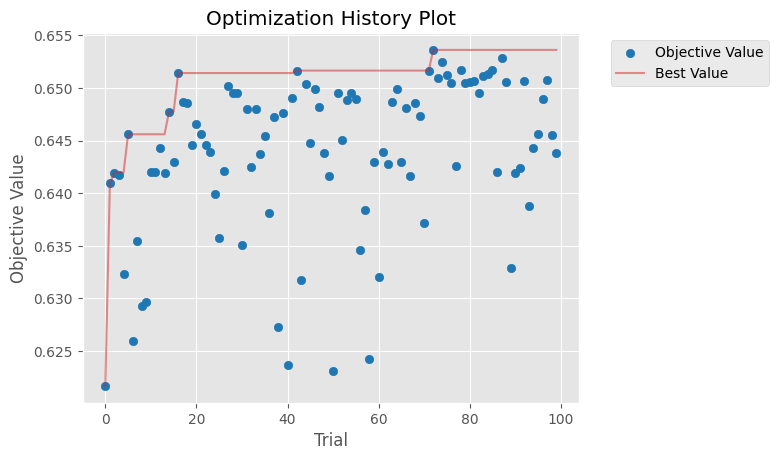

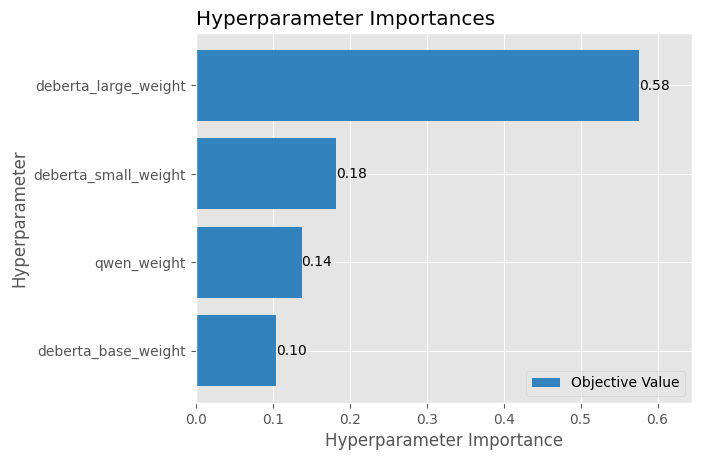

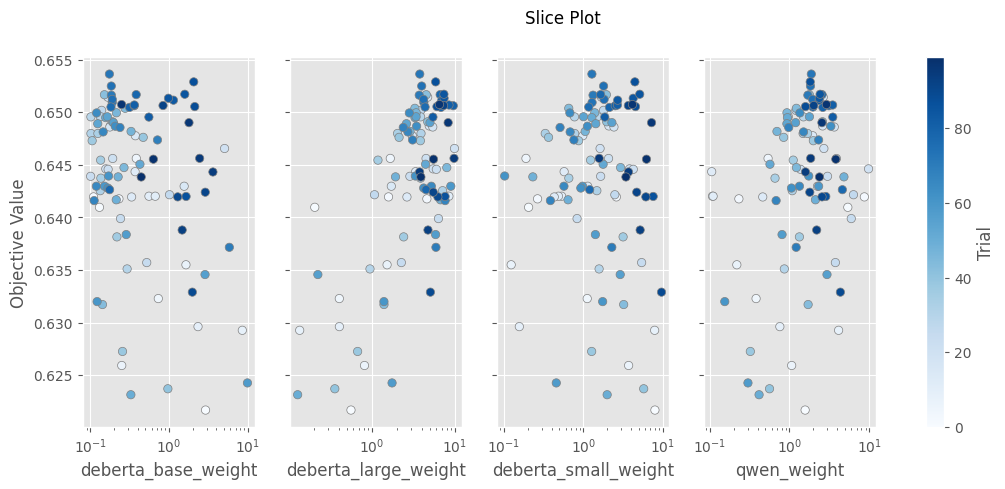

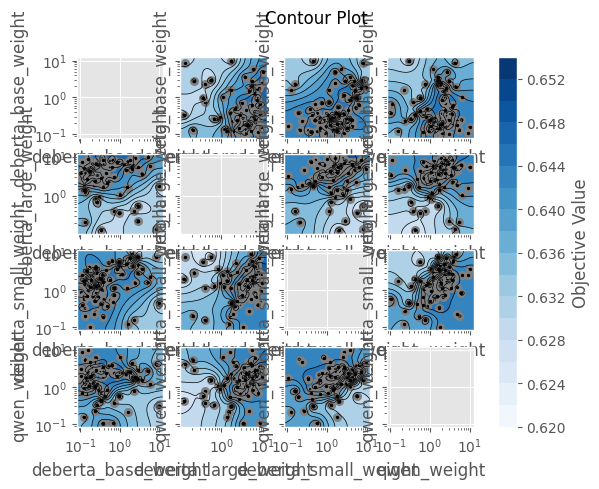

In [8]:
import optuna
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

# Combine OOF predictions from different models
oof_combined = pd.DataFrame({
    'conversation_id': oof_deberta_large['conversation_id'],
    'target': oof_deberta_large['target'],
    'fold': oof_deberta_large['fold'],
    'deberta_large_0': oof_deberta_large['target_0'],
    'deberta_large_1': oof_deberta_large['target_1'],
    'deberta_large_2': oof_deberta_large['target_2'],
    'deberta_small_0': oof_deberta_small['target_0'],
    'deberta_small_1': oof_deberta_small['target_1'],
    'deberta_small_2': oof_deberta_small['target_2'],
    'deberta_base_0': oof_deberta_base['target_0'],
    'deberta_base_1': oof_deberta_base['target_1'],
    'deberta_base_2': oof_deberta_base['target_2'],
    'qwen_0': oof_qwen['target_0'],
    'qwen_1': oof_qwen['target_1'],
    'qwen_2': oof_qwen['target_2']
})

# Prepare data for optimization
X = oof_combined[['deberta_large_0', 'deberta_large_1', 'deberta_large_2', 
                 'deberta_small_0', 'deberta_small_1', 'deberta_small_2',
                 'deberta_base_0', 'deberta_base_1', 'deberta_base_2',
                 'qwen_0', 'qwen_1', 'qwen_2']].values
y = oof_combined['target'].values

# Function to calculate macro F1 score
def calculate_macro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

# Simplified prediction function - only weighted averaging and argmax
def make_predictions(weights, probs):
    # Apply weights to probabilities
    weighted_probs = np.zeros((probs.shape[0], 3))
    
    # weights[0] for deberta_large, weights[1] for deberta_small, weights[2] for deberta_base, weights[3] for qwen
    for i in range(3):  # For each class (0, 1, 2)
        weighted_probs[:, i] = (weights[0] * probs[:, i] +      # deberta_large
                               weights[1] * probs[:, i+3] +    # deberta_small
                               weights[2] * probs[:, i+6] +    # deberta_base
                               weights[3] * probs[:, i+9])     # qwen
    
    # Just use argmax to get predictions
    preds = np.argmax(weighted_probs, axis=1)
    return preds

# Define the Optuna objective function
def objective(trial):
    # Sample weights using optuna
    # Using suggest_float with log=True gives better exploration of different scales
    w1 = trial.suggest_float('deberta_large_weight', 0.1, 10.0, log=True)
    w2 = trial.suggest_float('deberta_small_weight', 0.1, 10.0, log=True)
    w3 = trial.suggest_float('deberta_base_weight', 0.1, 10.0, log=True)
    w4 = trial.suggest_float('qwen_weight', 0.1, 10.0, log=True)
    
    # Normalize weights to sum to 1
    weights = np.array([w1, w2, w3, w4])
    weights = weights / np.sum(weights)
    
    # Make predictions and calculate score
    preds = make_predictions(weights, X)
    score = calculate_macro_f1(y, preds)
    
    return score  # Optuna maximizes by default

# Create and run the study
print("Starting Optuna optimization...")
study = optuna.create_study(direction='maximize', 
                           sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Get best parameters and score
print("Best trial:")
print("  Score: {}".format(study.best_value))
best_trial = study.best_trial
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Get normalized weights from best parameters
best_raw_weights = np.array([
    best_trial.params['deberta_large_weight'],
    best_trial.params['deberta_small_weight'],
    best_trial.params['deberta_base_weight'],
    best_trial.params['qwen_weight']
])
best_weights = best_raw_weights / np.sum(best_raw_weights)

print("\nNormalized best weights:")
print(f"  deberta_large: {best_weights[0]:.4f}")
print(f"  deberta_small: {best_weights[1]:.4f}")
print(f"  deberta_base: {best_weights[2]:.4f}")
print(f"  qwen: {best_weights[3]:.4f}")

# Apply best weights to OOF predictions
oof_preds = make_predictions(best_weights, X)
oof_score = calculate_macro_f1(y, oof_preds)
print(f"\nOOF Macro F1 Score: {oof_score:.4f}")

# Visualization of optimization process
print("\nGenerating optimization visualizations...")
optuna.visualization.matplotlib.plot_optimization_history(study)
optuna.visualization.matplotlib.plot_param_importances(study)
optuna.visualization.matplotlib.plot_slice(study)
optuna.visualization.matplotlib.plot_contour(study)

# Baseline comparison
equal_weights = np.ones(4) / 4
baseline_preds = make_predictions(equal_weights, X)
baseline_score = calculate_macro_f1(y, baseline_preds)
improvement = (oof_score - baseline_score) / baseline_score * 100
print(f"\nBaseline score (equal weights): {baseline_score:.4f}")
print(f"Optimized score: {oof_score:.4f}")
print(f"Improvement: {improvement:.2f}%")

# Check individual model performance
print("\nIndividual model performance:")
model_weights = [
    [1, 0, 0, 0],  # Only deberta_large
    [0, 1, 0, 0],  # Only deberta_small
    [0, 0, 1, 0],  # Only deberta_base
    [0, 0, 0, 1]   # Only qwen
]

for i, weights in enumerate(model_weights):
    model_name = ["deberta_large", "deberta_small", "deberta_base", "qwen"][i]
    preds = make_predictions(weights, X)
    score = calculate_macro_f1(y, preds)
    print(f"{model_name} only: {score:.4f}")

# Apply to test data
print("\nApplying best weights to test data...")
test_combined = pd.DataFrame({
    'conversation_id': test_deberta_large['conversation_id'],
    'deberta_large_0': test_deberta_large['target_0'],
    'deberta_large_1': test_deberta_large['target_1'],
    'deberta_large_2': test_deberta_large['target_2'],
    'deberta_small_0': test_deberta_small['target_0'],
    'deberta_small_1': test_deberta_small['target_1'],
    'deberta_small_2': test_deberta_small['target_2'],
    'deberta_base_0': test_deberta_base['target_0'],
    'deberta_base_1': test_deberta_base['target_1'],
    'deberta_base_2': test_deberta_base['target_2'],
    'qwen_0': test_qwen['target_0'],
    'qwen_1': test_qwen['target_1'],
    'qwen_2': test_qwen['target_2']
})

# Apply optimized weights to test predictions
test_X = test_combined[['deberta_large_0', 'deberta_large_1', 'deberta_large_2', 
                       'deberta_small_0', 'deberta_small_1', 'deberta_small_2',
                       'deberta_base_0', 'deberta_base_1', 'deberta_base_2',
                       'qwen_0', 'qwen_1', 'qwen_2']].values
test_preds = make_predictions(best_weights, test_X)

# Create submission dataframe
submission = pd.DataFrame({
    'conversation_id': test_combined['conversation_id'],
    'pred': test_preds
})

print("\nSample of final predictions:")
print(submission.head())

# Save results
submission.to_csv('submission_optuna.csv', index=False)
print("\nSaved submission to 'submission_optuna.csv'")

# Additional analysis - check distribution of predictions
print("\nDistribution of predictions:")
print(pd.Series(test_preds).value_counts(normalize=True))

# Check for any confidence issues (predictions with small margins)
weighted_probs = np.zeros((test_X.shape[0], 3))
for i in range(3):
    weighted_probs[:, i] = (best_weights[0] * test_X[:, i] +
                           best_weights[1] * test_X[:, i+3] +
                           best_weights[2] * test_X[:, i+6] +
                           best_weights[3] * test_X[:, i+9])

max_probs = np.max(weighted_probs, axis=1)
print("\nConfidence analysis:")
print(f"Mean confidence: {np.mean(max_probs):.4f}")
print(f"Min confidence: {np.min(max_probs):.4f}")
print(f"25th percentile: {np.percentile(max_probs, 25):.4f}")
print(f"Median confidence: {np.median(max_probs):.4f}")
print(f"75th percentile: {np.percentile(max_probs, 75):.4f}")

In [9]:
import numpy as np
import pandas as pd
import optuna
from sklearn.metrics import f1_score

# === STEP 1: Load your predictions ===
# Example format:
# oof_combined has 12 model-class columns and a 'target' column

X = oof_combined[[
    'deberta_large_0', 'deberta_large_1', 'deberta_large_2', 
    'deberta_small_0', 'deberta_small_1', 'deberta_small_2',
    'deberta_base_0', 'deberta_base_1', 'deberta_base_2',
    'qwen_0', 'qwen_1', 'qwen_2'
]].values

y = oof_combined['target'].values


# === STEP 2: Define weighted ensemble prediction ===
def make_predictions_12weights(weights, X):
    weights = np.array(weights).reshape(4, 3)  # shape: (model, class)
    weighted_probs = np.zeros((X.shape[0], 3))

    for class_idx in range(3):
        # weights[:, class_idx] = weights for this class across all models
        weighted_probs[:, class_idx] = (
            weights[0, class_idx] * X[:, class_idx] +         # deberta_large
            weights[1, class_idx] * X[:, class_idx + 3] +     # deberta_small
            weights[2, class_idx] * X[:, class_idx + 6] +     # deberta_base
            weights[3, class_idx] * X[:, class_idx + 9]       # qwen
        )

    # Normalize to sum to 1
    weighted_probs /= weighted_probs.sum(axis=1, keepdims=True)
    return np.argmax(weighted_probs, axis=1)


# === STEP 3: Objective for Optuna ===
def objective(trial):
    # Suggest 12 weights
    weights = []
    for class_idx in range(3):
        w1 = trial.suggest_float(f'm{0}_c{class_idx}', 0, 1, step=0.01)
        w2 = trial.suggest_float(f'm{1}_c{class_idx}', 0, 1, step=0.01)
        w3 = trial.suggest_float(f'm{2}_c{class_idx}', 0, 1, step=0.01)
        w4 = 1.0 - w1 - w2 - w3
        if w4 < 0 or w4 > 1:
            raise optuna.exceptions.TrialPruned()
        weights.extend([w1, w2, w3, w4])

    # Reshape weights to (4, 3)
    weights = np.array(weights).reshape(4, 3)
    preds = make_predictions_12weights(weights, X)
    return f1_score(y, preds, average='macro')


# === STEP 4: Run Optuna ===
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

# === STEP 5: Retrieve best weights and score ===
best_weights_flat = []
for class_idx in range(3):
    w1 = study.best_params[f'm0_c{class_idx}']
    w2 = study.best_params[f'm1_c{class_idx}']
    w3 = study.best_params[f'm2_c{class_idx}']
    w4 = 1.0 - w1 - w2 - w3
    best_weights_flat.extend([w1, w2, w3, w4])
best_weights = np.array(best_weights_flat).reshape(4, 3)

print("Optimized Weights (models × classes):")
print(pd.DataFrame(best_weights, index=['deberta_large', 'deberta_small', 'deberta_base', 'qwen']))
print(f"Best Macro F1 Score: {study.best_value:.4f}")


# === STEP 6: Final OOF Evaluation ===
final_preds = make_predictions_12weights(best_weights, X)
final_f1 = f1_score(y, final_preds, average='macro')
print(f"Final OOF Macro F1: {final_f1:.4f}")


# === STEP 7: Apply to Test Set ===
test_X = test_combined[[
    'deberta_large_0', 'deberta_large_1', 'deberta_large_2', 
    'deberta_small_0', 'deberta_small_1', 'deberta_small_2',
    'deberta_base_0', 'deberta_base_1', 'deberta_base_2',
    'qwen_0', 'qwen_1', 'qwen_2'
]].values

test_preds = make_predictions_12weights(best_weights, test_X)

submission = pd.DataFrame({
    'conversation_id': test_combined['conversation_id'],
    'pred': test_preds
})

# submission.to_csv("submission.csv", index=False)


[I 2025-04-25 17:27:40,396] A new study created in memory with name: no-name-ef82a5a7-f2d3-4be8-9628-44c77576b028
[I 2025-04-25 17:27:40,398] Trial 0 pruned. 
[I 2025-04-25 17:27:40,399] Trial 1 pruned. 
[I 2025-04-25 17:27:40,400] Trial 2 pruned. 
[I 2025-04-25 17:27:40,401] Trial 3 pruned. 
[I 2025-04-25 17:27:40,402] Trial 4 pruned. 
[I 2025-04-25 17:27:40,403] Trial 5 pruned. 
[I 2025-04-25 17:27:40,403] Trial 6 pruned. 
[I 2025-04-25 17:27:40,404] Trial 7 pruned. 
[I 2025-04-25 17:27:40,405] Trial 8 pruned. 
[I 2025-04-25 17:27:40,405] Trial 9 pruned. 
[I 2025-04-25 17:27:40,413] Trial 10 pruned. 
[I 2025-04-25 17:27:40,426] Trial 11 pruned. 
[I 2025-04-25 17:27:40,442] Trial 12 pruned. 
[I 2025-04-25 17:27:40,449] Trial 13 pruned. 
[I 2025-04-25 17:27:40,457] Trial 14 pruned. 
[I 2025-04-25 17:27:40,469] Trial 15 pruned. 
[I 2025-04-25 17:27:40,477] Trial 16 pruned. 
[I 2025-04-25 17:27:40,485] Trial 17 pruned. 
[I 2025-04-25 17:27:40,492] Trial 18 pruned. 
[I 2025-04-25 17:27:40

Optimized Weights (models × classes):
                  0     1     2
deberta_large  0.55  0.25  0.14
deberta_small  0.06  0.48  0.24
deberta_base   0.09  0.19  0.33
qwen           0.23  0.29  0.15
Best Macro F1 Score: 0.6548
Final OOF Macro F1: 0.6548


In [ ]:
submission.head()

In [10]:
def make_predictions_with_thresholds(weights, thresholds, X):
    weights = np.array(weights).reshape(4, 3)  # Updated to 4 models
    probs = np.zeros((X.shape[0], 3))

    # Weighted probabilities
    for i in range(3):  # class index
        probs[:, i] = (
            weights[0, i] * X[:, i] +      # deberta_large
            weights[1, i] * X[:, i+3] +    # deberta_small
            weights[2, i] * X[:, i+6] +    # deberta_base
            weights[3, i] * X[:, i+9]      # qwen
        )

    # Normalize
    probs /= probs.sum(axis=1, keepdims=True)

    # Thresholding
    preds = []
    for row in probs:
        flags = row >= thresholds
        if flags.sum() == 1:
            preds.append(np.argmax(flags))  # one match
        elif flags.sum() > 1:
            # Choose class with max (prob / threshold)
            ratios = row / thresholds
            preds.append(np.argmax(ratios))
        else:
            preds.append(np.argmax(row))  # fallback
    return np.array(preds)

def threshold_objective(trial):
    thresholds = [
        trial.suggest_float("t0", 0.1, 0.9),
        trial.suggest_float("t1", 0.1, 0.9),
        trial.suggest_float("t2", 0.1, 0.9)
    ]
    preds = make_predictions_with_thresholds(best_weights, thresholds, X)
    return f1_score(y, preds, average='macro')

threshold_study = optuna.create_study(direction="maximize")
threshold_study.optimize(threshold_objective, n_trials=200)

best_thresholds = [
    threshold_study.best_params['t0'],
    threshold_study.best_params['t1'],
    threshold_study.best_params['t2']
]

print("Best thresholds:", best_thresholds)

threshold_study = optuna.create_study(direction="maximize")
threshold_study.optimize(threshold_objective, n_trials=200)

best_thresholds = [
    threshold_study.best_params['t0'],
    threshold_study.best_params['t1'],
    threshold_study.best_params['t2']
]

print("Best thresholds:", best_thresholds)

final_preds_thresh = make_predictions_with_thresholds(best_weights, best_thresholds, X)
print("OOF Macro F1 with thresholds:", f1_score(y, final_preds_thresh, average='macro'))


[I 2025-04-25 17:28:26,504] A new study created in memory with name: no-name-9c5ef1d4-46ea-4bee-a8f9-e46ee39da856
[I 2025-04-25 17:28:26,521] Trial 0 finished with value: 0.6548275093870705 and parameters: {'t0': 0.6807012770953393, 't1': 0.6323549511187017, 't2': 0.79418290727564}. Best is trial 0 with value: 0.6548275093870705.
[I 2025-04-25 17:28:26,535] Trial 1 finished with value: 0.6215306674923409 and parameters: {'t0': 0.5501068315145924, 't1': 0.12061143782085892, 't2': 0.29010930809754276}. Best is trial 0 with value: 0.6548275093870705.
[I 2025-04-25 17:28:26,546] Trial 2 finished with value: 0.6351313686391656 and parameters: {'t0': 0.25888762730127224, 't1': 0.3928699820131307, 't2': 0.859201381048531}. Best is trial 0 with value: 0.6548275093870705.
[I 2025-04-25 17:28:26,556] Trial 3 finished with value: 0.6304203487988179 and parameters: {'t0': 0.2759488354452689, 't1': 0.52731470614613, 't2': 0.6953058000353632}. Best is trial 0 with value: 0.6548275093870705.
[I 2025-

Best thresholds: [0.7367636361389686, 0.6240628094408469, 0.48573325283976926]


[I 2025-04-25 17:28:29,700] Trial 18 finished with value: 0.6504261354556714 and parameters: {'t0': 0.5653657532317512, 't1': 0.8083577746793098, 't2': 0.3238650358769627}. Best is trial 9 with value: 0.6548275093870705.
[I 2025-04-25 17:28:29,717] Trial 19 finished with value: 0.6548275093870705 and parameters: {'t0': 0.6892931242459853, 't1': 0.6361056811350055, 't2': 0.7021751448265546}. Best is trial 9 with value: 0.6548275093870705.
[I 2025-04-25 17:28:29,731] Trial 20 finished with value: 0.6540203016333092 and parameters: {'t0': 0.43545448021950095, 't1': 0.42429348944416856, 't2': 0.6089677893054317}. Best is trial 9 with value: 0.6548275093870705.
[I 2025-04-25 17:28:29,745] Trial 21 finished with value: 0.6548275093870705 and parameters: {'t0': 0.6788043510686734, 't1': 0.8992056102750958, 't2': 0.8962797638478369}. Best is trial 9 with value: 0.6548275093870705.
[I 2025-04-25 17:28:29,758] Trial 22 finished with value: 0.6548275093870705 and parameters: {'t0': 0.625282589727

Best thresholds: [0.7205084605968624, 0.8582822323846042, 0.4910754448941209]
OOF Macro F1 with thresholds: 0.6551910929669479


In [11]:
test_preds_thresh = make_predictions_with_thresholds(best_weights, best_thresholds, test_X)

submission_thresh = pd.DataFrame({
    'conversation_id': test_combined['conversation_id'],
    'pred': test_preds_thresh
})
submission_thresh.head()
# submission_thresh.to_csv("submission_thresh.csv", index=False)

conversation_id  pred
0  1030-adb61831-0383-4e51-a673-ab978590f69b     0
1  1030-adb61831-0383-4e51-a673-ab978590f69b     0
2  1030-adb61831-0383-4e51-a673-ab978590f69b     0
3  1030-adb61831-0383-4e51-a673-ab978590f69b     0
4  1030-adb61831-0383-4e51-a673-ab978590f69b     2

In [12]:

# Data Processing Functions
def load_test_data(test_data_path='///mnt/c/Personal/Competitions/BEA_2025_track4/data/mrbench_v3_testset.json'):
    """
    Load development and (optionally) test datasets
    """    
    # Load test data if provided
    test_examples = []
    test_data = None
    if test_data_path:
        with open(test_data_path, 'r',encoding="utf-8") as f:
            test_data = json.load(f)
        
        for dialogue in test_data:
            conversation_id = dialogue["conversation_id"]
            conversation_history = dialogue["conversation_history"]
            
            for tutor_id, tutor_data in dialogue["tutor_responses"].items():
                test_examples.append({
                    "conversation_id": conversation_id,
                    "conversation_history": conversation_history,
                    "tutor_response": tutor_data["response"],
                    "tutor_id": tutor_id
                })
    
    return test_examples, test_data

test_examples,test_data = load_test_data()

In [13]:
# Create submission file
submission = []
unique_conversation_ids = list(ex["conversation_id"] for ex in test_examples)
pred_labels = submission_thresh['pred'].values
# Define the tutor classes
CLASSES = [
    "Yes",
    "To some extent",
    "No",
]
# ['Yes', 'To some extent', 'No
# Create label mappings
id2label = {i: label for i, label in enumerate(CLASSES)}
label2id = {v: k for k, v in id2label.items()}
print(id2label, label2id)

for conversation_id in unique_conversation_ids:
    conversation_data = next(d for d in test_data if d["conversation_id"] == conversation_id)
    submission_item = {
        "conversation_id": conversation_id,
        "conversation_history": conversation_data["conversation_history"],
        "tutor_responses": {}
    }
        
    for tutor_id, tutor_data in conversation_data["tutor_responses"].items():
        # Find the corresponding prediction
        idx = next(i for i, ex in enumerate(test_examples) 
                    if ex["conversation_id"] == conversation_id and ex["tutor_id"] == tutor_id)
        
        predicted_class = id2label[pred_labels[idx]]
        
        submission_item["tutor_responses"][tutor_id] = {
            "response": tutor_data["response"],
            "annotation": {
                "Actionability": predicted_class
            }
        }
    
    submission.append(submission_item)

{0: 'Yes', 1: 'To some extent', 2: 'No'} {'Yes': 0, 'To some extent': 1, 'No': 2}


In [14]:
submission

[{'conversation_id': '1030-adb61831-0383-4e51-a673-ab978590f69b',
  'conversation_history': 'Tutor: Hi, could you please provide a step-by-step solution for the question below? The question is: Tyson decided to make muffaletta sandwiches for the big game.  Each sandwich required 1 pound each of meat and cheese and would serve 4 people.  There would be 20 people in total watching the game.  The meat cost $7.00 per pound and the cheese cost $3.00 per pound.  How much money would he spend on the meat and cheese to make enough sandwiches to serve 20 people? \n Student: To serve 20 people, Tyson needs to make 20/4 = 5 sandwiches.\nEach sandwich requires 1+1 = 2 pounds of meat and cheese.\nFor 5 sandwiches, he needs a total of 2 x 5 = 10 pounds of meat and cheese.\nThe cost of 10 pounds of meat is 10 x $7.00 = $70.\nThe cost of 10 pounds of cheese is 10 x $3.00 = $30.\nThe total cost of meat and cheese is $70 + $30 = $100.\n 100 \n Tutor: do you want to talk me through your solution \n Stude

In [15]:
import os
with open(os.path.join("///mnt/c/Personal/Competitions/BEA_2025_track4/ensemblev1", "predictions.json"), "w") as f:
    json.dump(submission, f, indent=2)